In [1]:
def heuristic(state_x, state_y, final_x, final_y):
    return min(abs(state_x - final_x)/2,abs(state_y - final_y)/2)
    if(abs(state_x - final_x) <= 2):
        #print "diff in x abs <= 2 " 
        if(abs(state_y - final_y) <=2):
            #print "diff in y abs <= 2 "
            return 1;
        else:
            return 2;
    else:
        return 2;    

In [2]:
import datetime
import random
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from collections import defaultdict;
class HorseNode:
    def __init__(self, x, y, final_x, final_y, path_cost):
        self.pos_x = x
        self.pos_y = y
        self.h_cost = heuristic(x, y, final_x, final_y)
        self.g_cost = path_cost
        self.f_cost = self.g_cost + self.h_cost

def appendToFrontier(newNode, Frontier):
    if(newNode.f_cost in Frontier):
        Frontier[newNode.f_cost].append(newNode)
    else:
        Frontier[newNode.f_cost] = [newNode]

def expandNode(Node, Frontier, final_x, final_y, VisitedHashSet):
    if((Node.pos_x+1, Node.pos_y+2) not in VisitedHashSet):
        h1 = HorseNode(Node.pos_x+1, Node.pos_y+2, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h1, Frontier)
    if((Node.pos_x+2, Node.pos_y+1) not in VisitedHashSet):
        h2 = HorseNode(Node.pos_x+2, Node.pos_y+1, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h2, Frontier)
    if((Node.pos_x+1, Node.pos_y-2) not in VisitedHashSet):
        h3 = HorseNode(Node.pos_x+1, Node.pos_y-2, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h3, Frontier)
    if((Node.pos_x+2, Node.pos_y-1) not in VisitedHashSet):
        h4 = HorseNode(Node.pos_x+2, Node.pos_y-1, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h4, Frontier)
    if((Node.pos_x-1, Node.pos_y+2) not in VisitedHashSet):
        h5 = HorseNode(Node.pos_x-1, Node.pos_y+2, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h5, Frontier)
    if((Node.pos_x-2, Node.pos_y+1) not in VisitedHashSet):
        h6 = HorseNode(Node.pos_x-2, Node.pos_y+1, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h6, Frontier)
    if((Node.pos_x-1, Node.pos_y-2) not in VisitedHashSet):
        h7 = HorseNode(Node.pos_x-1, Node.pos_y-2, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h7, Frontier)
    if((Node.pos_x-2, Node.pos_y-1) not in VisitedHashSet):
        h8 = HorseNode(Node.pos_x-2, Node.pos_y-1, final_x, final_y, Node.g_cost+1)
        appendToFrontier(h8, Frontier)
    
def popMinNode(Frontier):
    m = min(i for i in Frontier.keys() if len(Frontier[i]) > 0)
    minNode = Frontier[m].pop(0)
    return minNode;
    
def findBestNode(Frontier, VisitedHashSet):
    bestNode = popMinNode(Frontier)
    tries = 0
    while(((bestNode.pos_x,bestNode.pos_y) in VisitedHashSet)):
#         tries+=1
        bestNode = popMinNode(Frontier)
#         if(tries==5):
#             print "ERROR Unable to find best Node"
#             break;
    #print "minimum F Cost is :: " + str(bestNode.f_cost)
    return bestNode

def checkIfFCostIsGreaterThanBestFinalNode(bestFinalNode, node):
    if(bestFinalNode.f_cost <= node.f_cost):
        return False
    return True
    

def checkNoOtherBetterNodeToExpand(Frontier, finalNode, VisitedHashSet):
    bestNodeToExpand = findBestNode(Frontier, VisitedHashSet)
    return checkIfFCostIsGreaterThanBestFinalNode(finalNode, bestNodeToExpand)

def goalTest(pos_x, pos_y, final_x, final_y):
    if(pos_x == final_x and pos_y == final_y):
        return True
    return False

def solveAstar(start_x, start_y, final_x, final_y):
    sNode = HorseNode(start_x, start_y, final_x, final_y, 0)
    HashSet = {(start_x,start_y): 1}
    Frontier = defaultdict(list)
    Frontier[sNode.f_cost] = [sNode]
    isCompleted = False
    VisitedHashSet = {}
    bestFinalNode = None
    FoundCostToFinal = False;
    noOfNodesExpanded = 0
    while(len(Frontier)!=0 or isCompleted):
        bestNode = findBestNode(Frontier, VisitedHashSet)
        isNodeGoalState = goalTest(bestNode.pos_x, bestNode.pos_y, final_x, final_y)
        if(FoundCostToFinal):
            if(not checkIfFCostIsGreaterThanBestFinalNode(bestFinalNode, bestNode)):
                break
        if(isNodeGoalState):
            if(not FoundCostToFinal):
                bestFinalNode = bestNode
                FoundCostToFinal = True
            else:
                if(bestFinalNode.g_cost > bestNode.g_cost):
                    bestFinalNode=bestNode
        if(isNodeGoalState and checkNoOtherBetterNodeToExpand(Frontier, bestNode, VisitedHashSet)):
            isCompleted = True
            break
        VisitedHashSet[(bestNode.pos_x, bestNode.pos_y)] = 1
        noOfNodesExpanded += 1
        # print "Expanding Node with co-ordinates (%s,%s) " %(bestNode.pos_x, bestNode.pos_y)
        expandNode(bestNode, Frontier, final_x, final_y, VisitedHashSet)
    return bestFinalNode, noOfNodesExpanded

In [8]:
minNode, noOfNodesExpanded = solveAstar(-1, -1, 3, 3)
print "Minimum Number of Moves are %d" %(minNode.g_cost)

Minimum Number of Moves are 4


In [11]:
# make up some data
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]
import timeit

# code you want to evaluate

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()
xMinMoves = []
y = []
xNodesExpanded = []
def generateRandomStartFinalPositions(startRange,endRange):
    start_x = random.randint(startRange, endRange)
    start_y = random.randint(startRange, endRange)
    final_x = random.randint(startRange, endRange)
    final_y = random.randint(startRange, endRange)
    if(start_x == final_x and start_y == final_y):
        return generateRandomStartFinalPositions(startRange,endRange)
    else:
        return start_x, start_y, final_x, final_y

for i in range(0,10):
    startRange = 1
    endRange = 100
    start_x, start_y, final_x, final_y = generateRandomStartFinalPositions(startRange,endRange)
    start_time = timeit.default_timer()
    #print "&&&&&&&&&&&&&&&"
    print start_x, start_y, final_x, final_y
    #print "&&&&&&&&&&&&&&&"
    minNode, noOfNodesExpanded = solveAstar(start_x, start_y, final_x, final_y)
    elapsed = timeit.default_timer() - start_time
    xMinMoves.append(minNode.g_cost)
    xNodesExpanded.append(noOfNodesExpanded)
    y.append(elapsed)





18 22 53 66
89 30 82 84
98 89 38 61
39 70 14 70
61 73 11 82
59 35 42 64
46 99 34 52
84 30 10 70
81 29 26 12
29 60 51 50


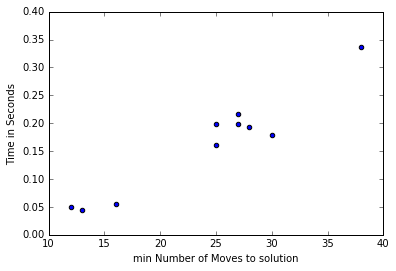

In [12]:
# plot
plt.xlabel('min Number of Moves to solution')
plt.ylabel('Time in Seconds')
plt.scatter(xMinMoves,y)

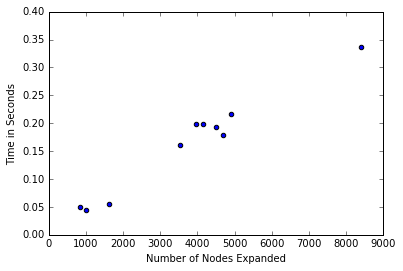

In [13]:
plt.xlabel('Number of Nodes Expanded')
plt.ylabel('Time in Seconds')
plt.scatter(xNodesExpanded,y)